In [49]:
import pandas as pd
import numpy as np

In [161]:
import distribution_modules as dm
import density_estimation_modules as dem
import classification_modules as cm
import pca_modules as pm
import importlib

importlib.reload(dm)
importlib.reload(dem)
importlib.reload(cm)
importlib.reload(pm)

<module 'pca_modules' from '/home/jupyter/thesis/pca_modules.py'>

In [51]:
# reading data
train_data = pd.read_csv('graphwave_ac_train.csv')
test_data = pd.read_csv('graphwave_ac_test.csv')

In [53]:
# set configuration
nr_moments = 5

# classificatio
test_size = 0.5
cv = 5
cv_config = [test_size, cv]

<AxesSubplot:title={'center':'Number of Training Data Points per Class'}>

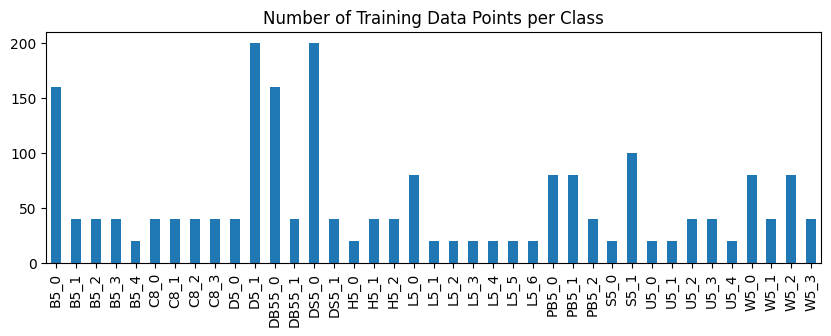

In [54]:
train_data['label'].value_counts().sort_index().plot(figsize=(10,3), kind='bar', 
                                                     title='Number of Training Data Points per Class')

<AxesSubplot:>

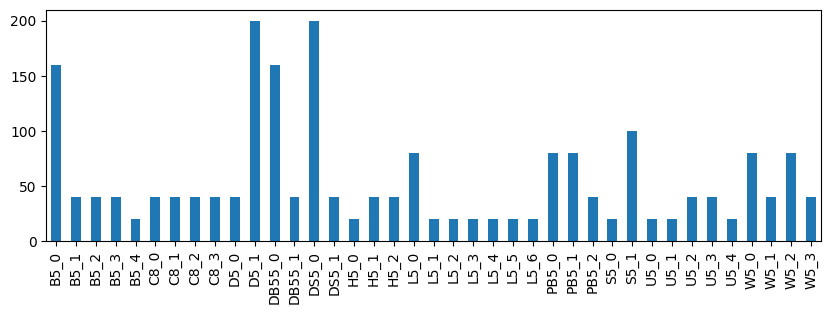

In [55]:
test_data['label'].value_counts().sort_index().plot(figsize=(10,3), kind='bar')

In [56]:
moments_df = dem.get_moments(train_data,nr_moments)
moments_df.head(3)

,m1,m2,m3,m4,m5,label
0,0.000747,0.000100,0.000017,0.000003,6.822420e-07,B5_0
1,0.000595,0.000086,0.000015,0.000003,5.477625e-07,B5_0
2,0.000671,0.000094,0.000016,0.000003,6.277921e-07,B5_0


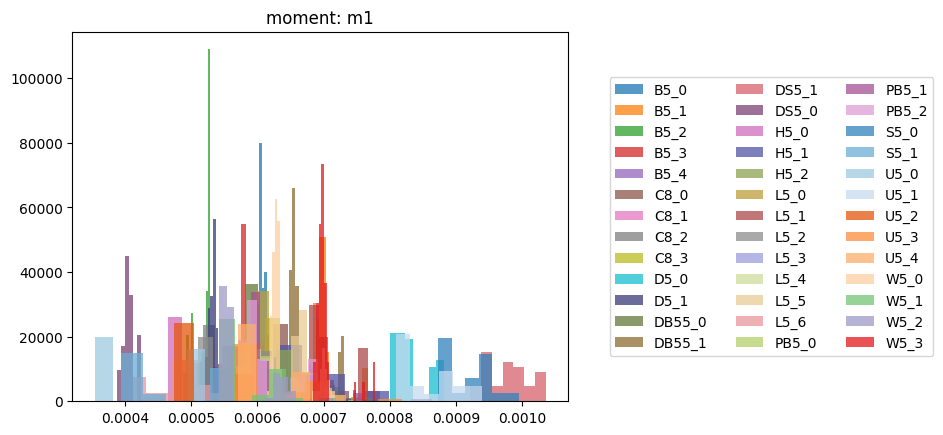

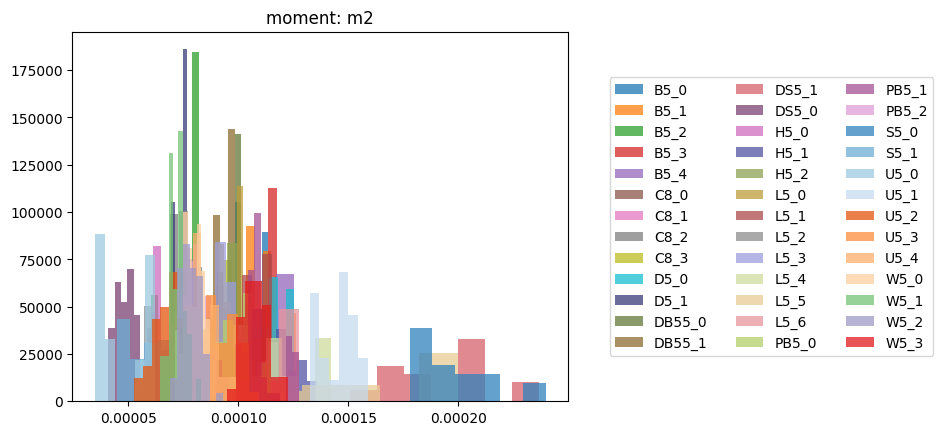

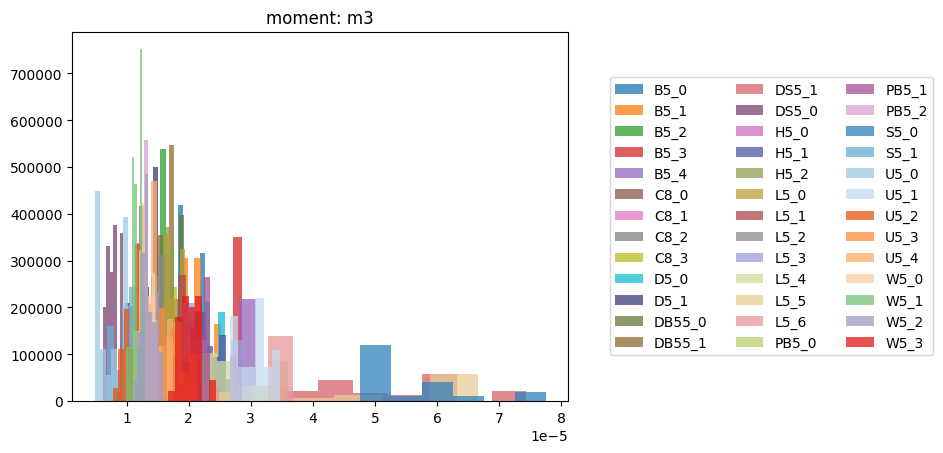

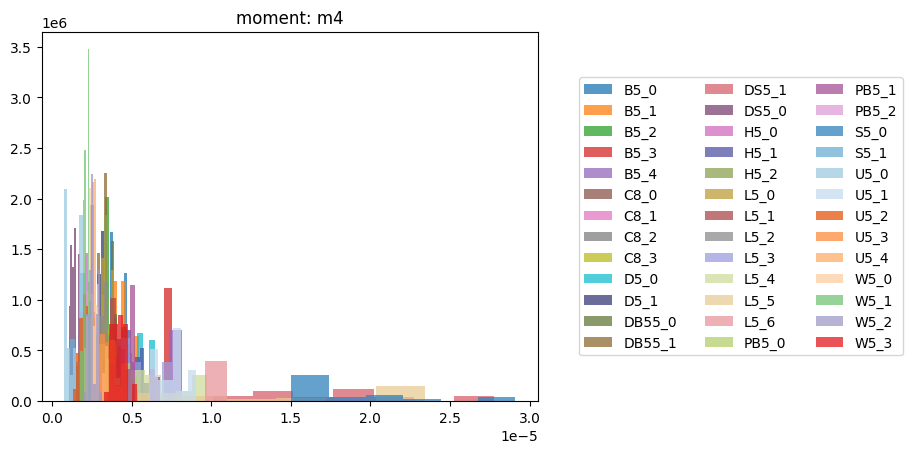

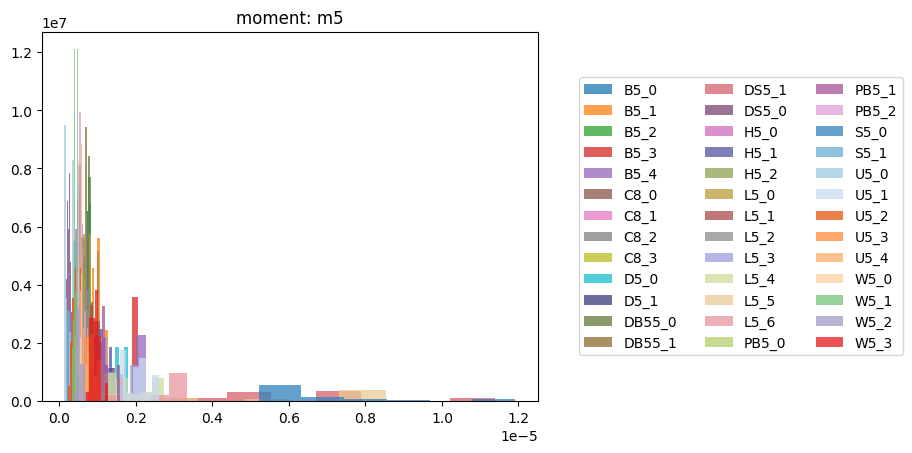

In [57]:
dem.get_histogram_of_moments(moments_df)

In [ ]:
pca_res = pm.perform_pca(moments_df, 5)

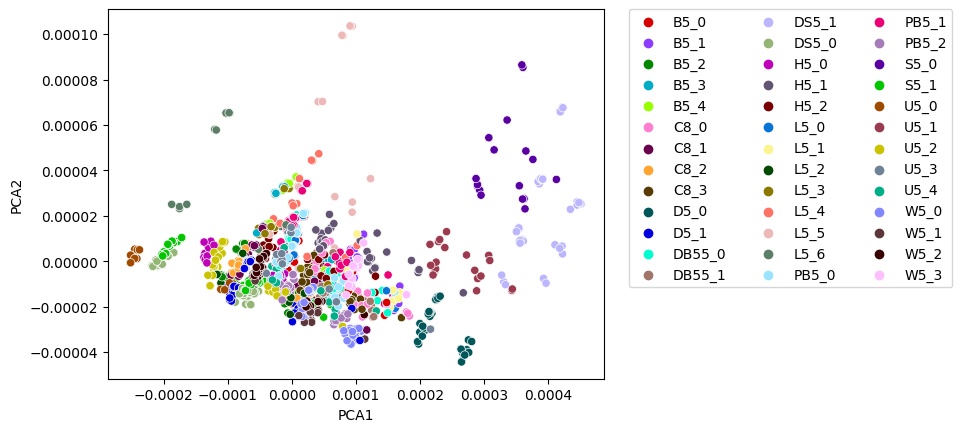

In [115]:
pm.plot_pca(pca_res, 'PCA1','PCA2', 39)

In [ ]:
# setting values for cross validation
nr_moments_list = list(np.arange(2,31,2))

In [61]:
res_svm = cm.cv_moments(nr_moments_list, test_data, train_data, cv_config, 1)

  0%|          | 0/15 [00:00<?, ?it/s]

In [60]:
res_lr = cm.cv_moments(nr_moments_list, test_data, train_data, cv_config, 2)

  0%|          | 0/15 [00:00<?, ?it/s]

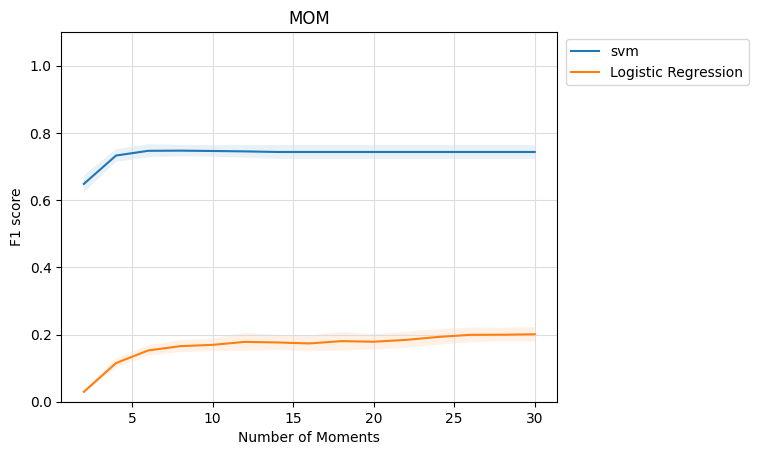

In [162]:
cm.plot_cv_moments(res_svm, res_lr)

In [92]:
import json
res_svm['nr_moments'] = [int(i) for i in res_svm['nr_moments']]
res_lr['nr_moments'] = [int(i) for i in res_lr['nr_moments']]

with open('results/moments/res_svm.json', 'w') as f:
    json.dump(res_svm, f)

with open('results/moments/res_lr.json', 'w') as f:
    json.dump(res_lr, f)

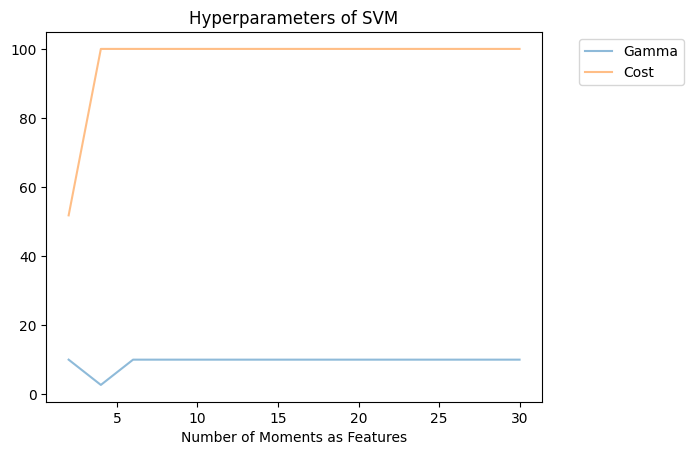

In [47]:
cm.plot_cv_h_params(res_svm)

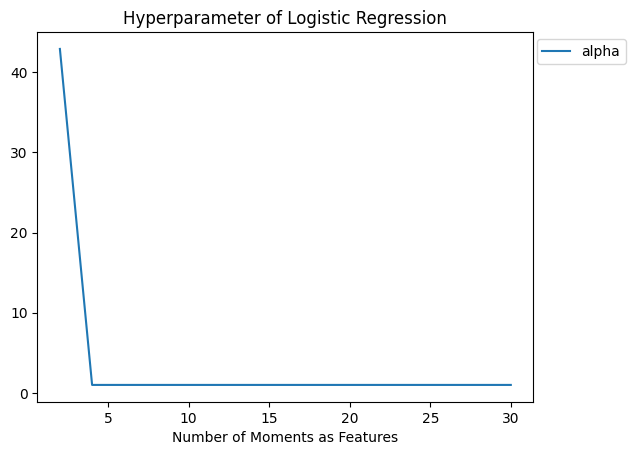

In [48]:
cm.plot_cv_h_params(res_lr)

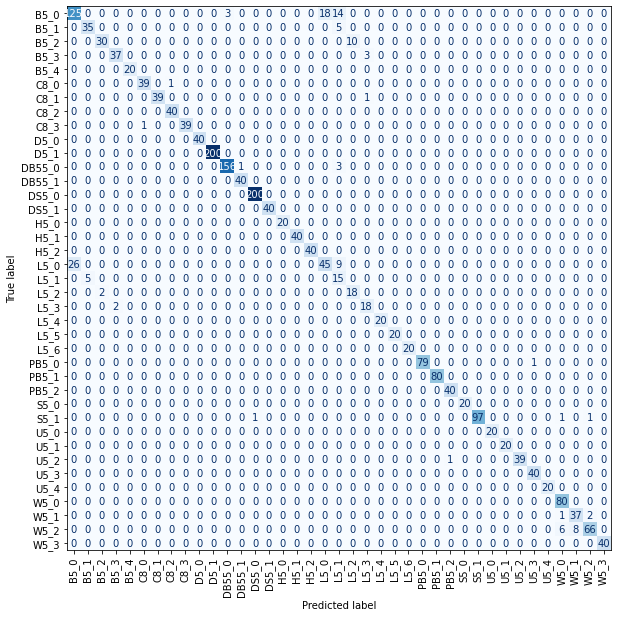

0.9407826259122086

In [83]:
max_index = res_svm['f1'].index(max(res_svm['f1']))
cost = res_svm['cost'][max_index]
gamma = res_svm['gamma'][max_index]
nr_moments = res_svm['nr_moments'][max_index]
cm.svm_given_params(test_data, train_data, 1, nr_moments, cost, gamma, plot=1)

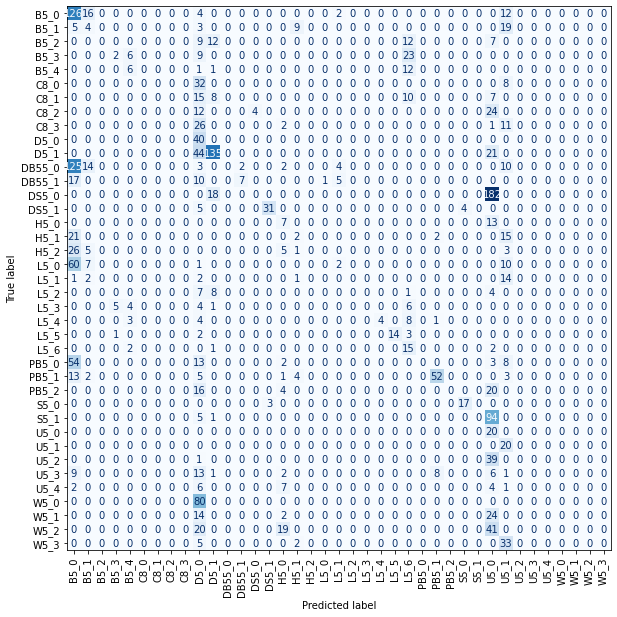

0.16425880426260328

In [85]:
max_index = res_lr['f1'].index(max(res_lr['f1']))
alpha = res_lr['alpha'][max_index]
nr_moments = res_svm['nr_moments'][max_index]
cm.lr_given_params(test_data, train_data, 1, nr_moments, alpha, plot=1)

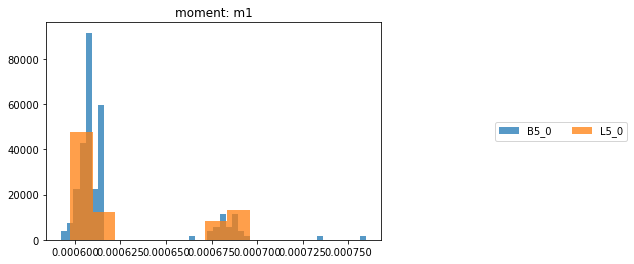

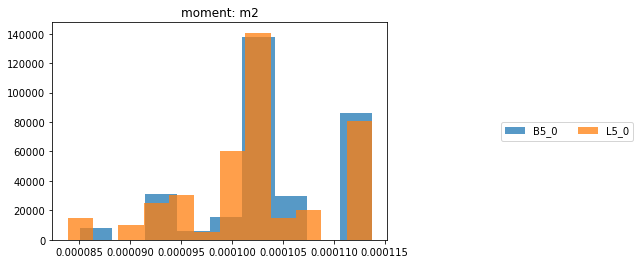

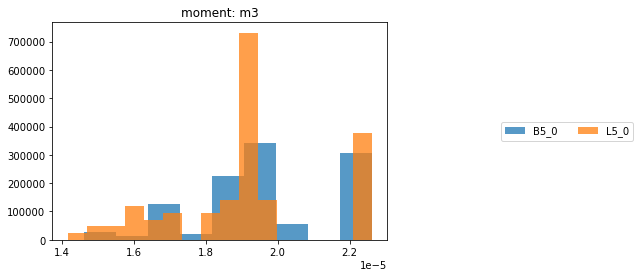

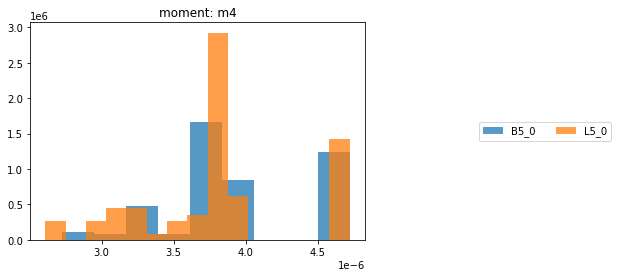

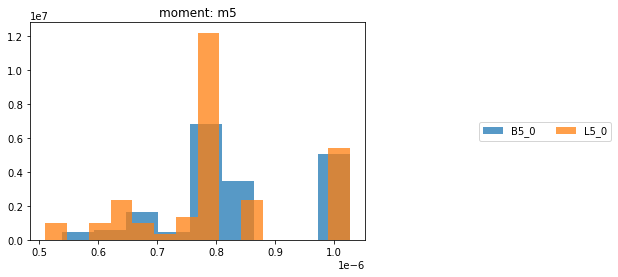

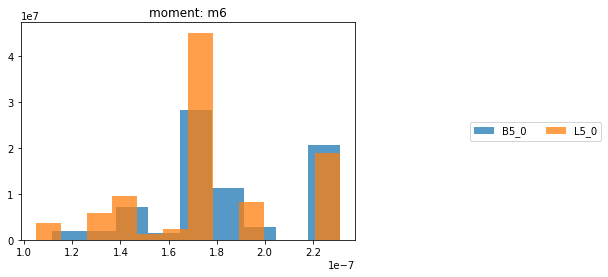

In [188]:
subset = moments_df.loc[(moments_df['label']== 'B5_0') | (moments_df['label']== 'L5_0')]
dem.get_histogram_of_moments(subset)

In [415]:
nr_moments_list = list(range(2,31))
n_estimators_list = [10, 20, 50, 100, 200]
max_depth_list = [1, 3, 5, 8]
gbm_config = [n_estimators_list, max_depth_list]
res_gbm = cm.cv_moments_gbm(nr_moments_list, test_data, train_data, gbm_config, cv_config)

  0%|          | 0/5 [00:00<?, ?it/s]

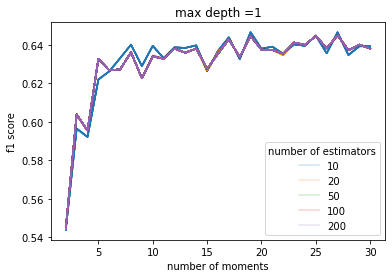

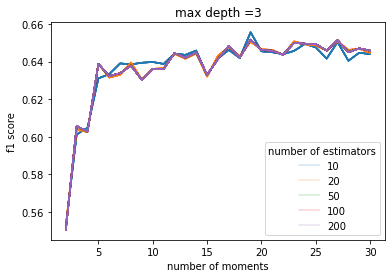

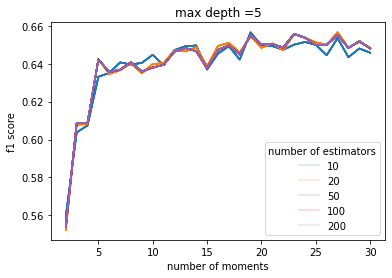

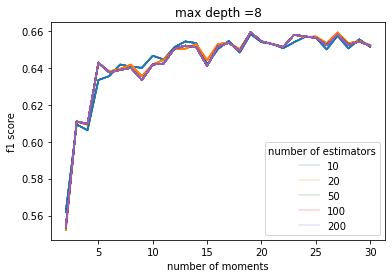

In [420]:
for m in range(len(res_gbm['max_depth'])):
    fig, ax = plt.subplots()
    colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
    handles = []
    for n, color in zip(range(len(res_gbm['n_estimators'])), colors):
        for i in range(len(res_gbm['nr_moments'])):
            hh = plt.plot(res_gbm['nr_moments'], res_gbm['f1'][n][m], alpha=0.2, label=res_gbm['n_estimators'][n], c=color)
        handles.append(hh[0] if isinstance(hh, list) else hh)
        plt.legend(handles=handles, title='number of estimators')
        plt.title('max depth =%d' %res_gbm['max_depth'][m])
        plt.xlabel('number of moments')
        plt.ylabel('f1 score')

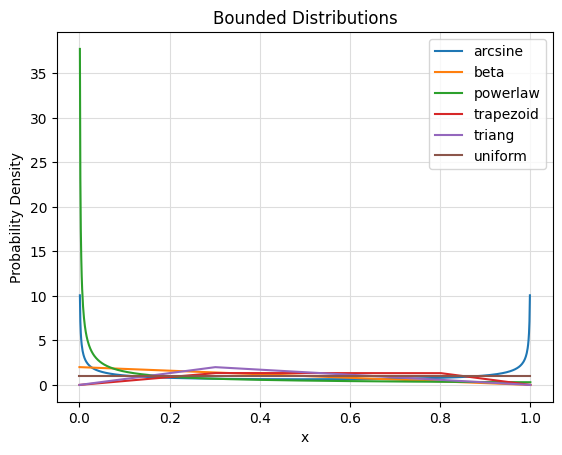

In [149]:
import scipy.stats as stats
x = np.linspace(0, 1, 1000)
pdf_arcsine = stats.arcsine.pdf(x)
pdf_beta = stats.beta.pdf(x,1,2)
pdf_powerlaw = stats.powerlaw.pdf(x,0.3)
pdf_trapezoid = stats.trapezoid.pdf(x,0.3,0.8)
pdf_triang = stats.triang.pdf(x,0.3)
pdf_uniform = stats.uniform.pdf(x)

plt.plot(x, pdf_arcsine, label='arcsine')
plt.plot(x, pdf_beta, label='beta')
plt.plot(x, pdf_powerlaw, label='powerlaw')
plt.plot(x, pdf_trapezoid, label='trapezoid')
plt.plot(x, pdf_triang, label='triang')
plt.plot(x, pdf_uniform, label='uniform')
plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(color='#DDDDDD')
plt.legend()
plt.title('Bounded Distributions')
plt.savefig('results/bounded_dists.png')

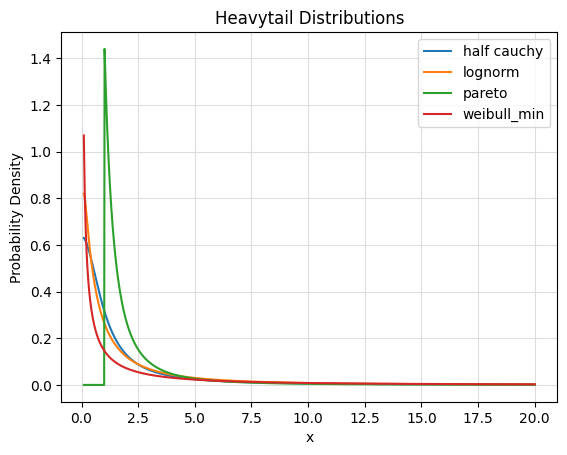

In [158]:
x = np.linspace(0.1, 20, 1000)
pdf_arcsine = stats.halfcauchy.pdf(x)
pdf_beta = stats.lognorm.pdf(x,1.5)
pdf_powerlaw = stats.pareto.pdf(x,1.5)
pdf_trapezoid = stats.weibull_min.pdf(x,0.4)


plt.plot(x, pdf_arcsine, label='half cauchy')
plt.plot(x, pdf_beta, label='lognorm')
plt.plot(x, pdf_powerlaw, label='pareto')
plt.plot(x, pdf_trapezoid, label='weibull_min')

plt.xlabel('x')
plt.ylabel('Probability Density')
plt.grid(color='#DDDDDD')
plt.legend()
plt.title('Heavytail Distributions')
plt.savefig('results/heavytail_dists.png')